In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('creditcard.csv')
df.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking the shape
df.shape

(284807, 31)

In [5]:
# print first 5
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# print random 15 
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

In [10]:
print('Before dropping duplicates: ', df.shape)
df = df.drop_duplicates()
print('After dropping duplicates: ', df.shape)

Before dropping duplicates:  (284807, 31)
After dropping duplicates:  (283726, 31)


In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.08,47481.05,0.00,54204.75,84692.50,139298.00,172792.00
V1,283726.0,0.01,1.95,-56.41,-0.92,0.02,1.32,2.45
V2,283726.0,-0.00,1.65,-72.72,-0.60,0.06,0.80,22.06
V3,283726.0,0.00,1.51,-48.33,-0.89,0.18,1.03,9.38
V4,283726.0,-0.00,1.41,-5.68,-0.85,-0.02,0.74,16.88
V5,283726.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,283726.0,-0.00,1.33,-26.16,-0.77,-0.28,0.40,73.30
V7,283726.0,0.00,1.23,-43.56,-0.55,0.04,0.57,120.59
V8,283726.0,-0.00,1.18,-73.22,-0.21,0.02,0.33,20.01
V9,283726.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


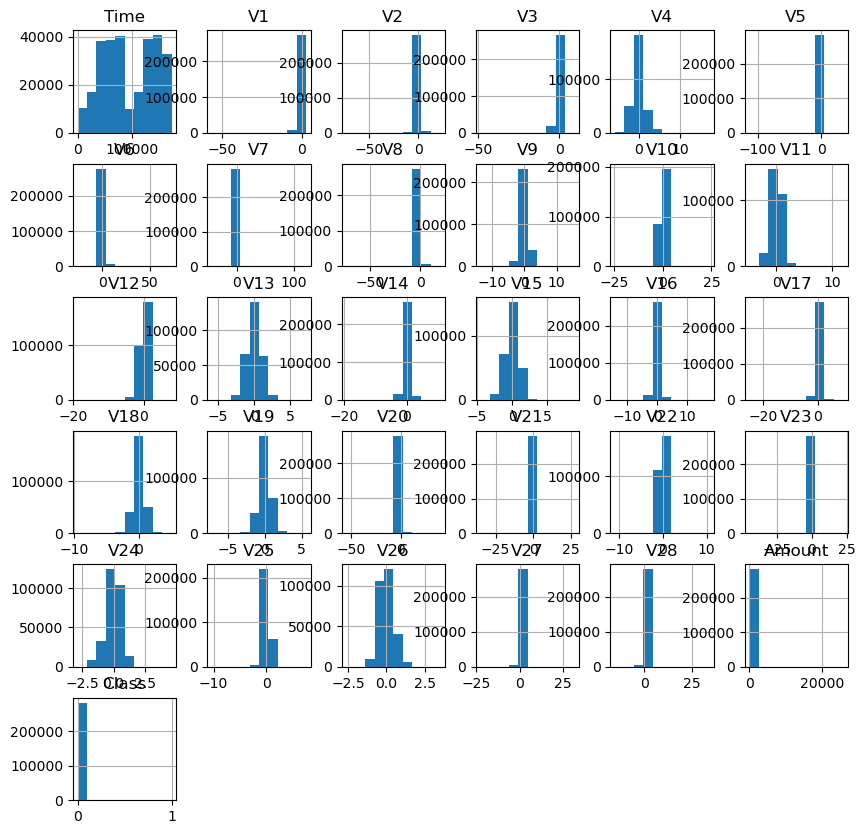

In [12]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

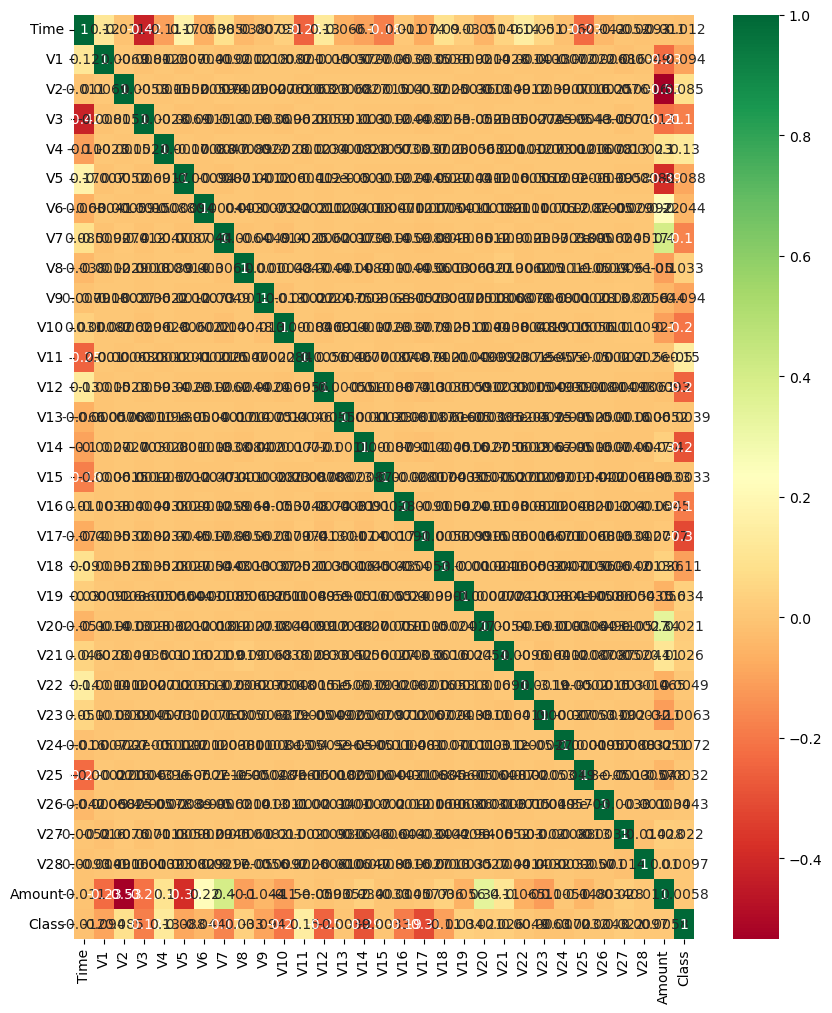

In [13]:
#get correlations of each feature in the dataset

corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(10,12))

#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
g

In [15]:
#separating the independent and dependent variables

X = df.drop(columns='Class', axis=1)
y = df['Class']
print(X.head())
print(y.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
print(standardised_data)

X = standardised_data
y = df.Class
print(X)
print(y)

[[-1.99682292 -0.70108232 -0.04168726 ...  0.33303251 -0.06584955
   0.24419951]
 [-1.99682292  0.60879165  0.16413764 ... -0.0271543   0.0432187
  -0.34258399]
 [-1.99680186 -0.7003364  -0.81133678 ... -0.14432548 -0.18382429
   1.15889967]
 ...
 [ 1.64227757  0.98235398 -0.18043304 ...  0.00680174 -0.08264021
  -0.0822395 ]
 [ 1.64227757 -0.12646526  0.32465977 ...  0.27052318  0.31700384
  -0.31339058]
 [ 1.64236181 -0.27686005 -0.1127094  ... -0.01055821  0.03994074
   0.51329005]]
[[-1.99682292 -0.70108232 -0.04168726 ...  0.33303251 -0.06584955
   0.24419951]
 [-1.99682292  0.60879165  0.16413764 ... -0.0271543   0.0432187
  -0.34258399]
 [-1.99680186 -0.7003364  -0.81133678 ... -0.14432548 -0.18382429
   1.15889967]
 ...
 [ 1.64227757  0.98235398 -0.18043304 ...  0.00680174 -0.08264021
  -0.0822395 ]
 [ 1.64227757 -0.12646526  0.32465977 ...  0.27052318  0.31700384
  -0.31339058]
 [ 1.64236181 -0.27686005 -0.1127094  ... -0.01055821  0.03994074
   0.51329005]]
0         0
1     

In [18]:
#80% is train, 20% is test
#random state is used to ensure a specific split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X.shape, X_train.shape, X_test.shape)

(283726, 30) (226980, 30) (56746, 30)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print( X_test)

[[-0.4815841   0.64880586 -0.40549792 ... -0.00458363  0.0402161
  -0.13168059]
 [ 0.5902349  -0.08864002  0.33658194 ... -0.15487101 -0.62814798
  -0.21866177]
 [-1.23948784 -0.62247583  0.31426984 ... -4.21299463 -4.55873402
  -0.34933322]
 ...
 [-0.81148473 -0.29770119 -0.10389965 ... -0.74140368 -0.50995693
  -0.23371774]
 [ 0.52936841 -1.3879288   1.18210043 ... -0.69178605  0.15996638
  -0.35328691]
 [-0.45186693 -0.68366415  1.27162985 ...  0.58903602  0.36107572
  -0.32065898]]


# logistic Regression

In [20]:
from sklearn.linear_model import \
LogisticRegression
lr_model = LogisticRegression\
(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

# KNeighborsClassifie

In [21]:
from sklearn.neighbors import \
KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# naive_baye Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

# support vector machine (svm)

In [23]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

# DecisionTree

In [24]:
from sklearn.tree import \
DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

# RandomForest

In [25]:
from sklearn.ensemble import \
RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#make the predictions using test data for all 6 models

lr_preds = lr_model.predict(X_test)

#knn_preds = knn_model.predict(X_test)

nb_preds = nb_model.predict(X_test)

svm_preds = svm_model.predict(X_test)


dt_preds = dt_model.predict(X_test)

rf_preds = rf_model.predict(X_test)


In [ ]:
## predictions and evaluation

In [ ]:
#get the accuracy of the models
print('Accuracy score of Logistic Regression:', 
      round(accuracy_score(y_test, lr_preds) * 100, 2))
#print('Accuracy score of KNN:', 
      round(accuracy_score(y_test, knn_preds) * 100, 2))
print('Accuracy score of Naive Bayes:', 
      round(accuracy_score(y_test, nb_preds) * 100, 2))
print('Accuracy score of SVM:', 
      round(accuracy_score(y_test, svm_preds) * 100, 2))
print('Accuracy score of Decision Tree:', 
      round(accuracy_score(y_test, dt_preds) * 100, 2))
print('Accuracy score of Random Forest:', 
      round(accuracy_score(y_test, rf_preds) * 100, 2))

In [38]:
import pickle
pickle.dump(svm_model, open('svm_model.pkl', 'wb')) 
#svm has the highest accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn.metrics import  confusion_matrix

print(confusion_matrix())